In [1]:
!pip install pandas

In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/league_of_legends_data_large.csv')
data.dropna(inplace=True)
print(data.head())

   win  kills  deaths  assists  gold_earned   cs  wards_placed  wards_killed  \
0    0     16       6       19        17088  231            11             7   
1    1      8       8        5        14865  259            10             2   
2    0      0      17       11        15919  169            14             5   
3    0     19      11        1        11534  264            14             3   
4    0     12       7        6        18926  124            15             7   

   damage_dealt  
0         15367  
1         38332  
2         24642  
3         15789  
4         40268  


In [3]:
X_data = data.drop(columns=['win'])
y_data = data.drop(columns=['kills', 'deaths', 'gold_earned', 'cs', 'wards_placed', 'wards_killed', 'damage_dealt', 'assists'])

print(X_data.head())
print(y_data.head())
print(f"X_data shape", X_data.shape)
print(f"y_data shape", y_data.shape)

   kills  deaths  assists  gold_earned   cs  wards_placed  wards_killed  \
0     16       6       19        17088  231            11             7   
1      8       8        5        14865  259            10             2   
2      0      17       11        15919  169            14             5   
3     19      11        1        11534  264            14             3   
4     12       7        6        18926  124            15             7   

   damage_dealt  
0         15367  
1         38332  
2         24642  
3         15789  
4         40268  
   win
0    0
1    1
2    0
3    0
4    0
X_data shape (1000, 8)
y_data shape (1000, 1)


In [4]:
!pip install scikit-learn

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(f"X_train Shape: ", X_train.shape)
print(f"X_test Shape: ", X_test.shape)
print(f"y_train Shape: ", y_train.shape)
print(f"y_test Shape: ", y_test.shape)

X_train Shape:  (800, 8)
X_test Shape:  (200, 8)
y_train Shape:  (800, 1)
y_test Shape:  (200, 1)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [7]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

     kills  deaths  assists  gold_earned   cs  wards_placed  wards_killed  \
29       8      12        0         7749  258             4             5   
535     12       9        7         7854  204            10             4   
695     15      13       15         9994   80             8             6   
557      5       6       13        16134  153            17             6   
836     13       9       17        12485   73            19             1   
..     ...     ...      ...          ...  ...           ...           ...   
106     15      12       14        17869   57             6             6   
270     16       5        7        18065  158            19             3   
860     16       3        2        15627  246             4             5   
435     19       7       10        12240  121             6             4   
102      1       0        6         5680  288            16             6   

     damage_dealt  
29          16232  
535         33810  
695         299

In [8]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [9]:
train_dataset[0]

(tensor([-0.2121,  0.4346, -1.5977, -1.0455,  1.0707, -1.0092,  0.1425, -0.8760]),
 tensor([1.]))

In [10]:
test_dataset[0]

(tensor([-1.2747,  0.4393, -1.4339,  1.5822,  0.4972, -0.3402,  0.2227, -0.0877]),
 tensor([0.]))

In [11]:
trainloader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
testloader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [12]:
for batch_idx, (features, labels) in enumerate(trainloader):
    print(f"Batch {batch_idx}:")
    print("Features:", features)
    print("Labels:", labels)

Batch 0:
Features: tensor([[ 1.1914,  1.3072, -0.0328, -1.1294, -0.3546, -1.5301,  0.1425,  0.4037],
        [ 0.6651, -0.0890,  0.1411,  1.3908,  1.4858, -1.7037, -1.2265, -1.3863],
        [ 0.3143,  1.4817, -0.3806, -0.5691, -1.3785, -1.3564, -0.5420, -1.5351],
        [ 1.1914, -0.0890, -0.0328,  0.4337,  0.4895, -0.4883,  1.5114,  1.3514],
        [ 0.6651, -0.7871, -0.9022,  0.1498, -1.0741, -0.8356, -0.8842,  1.5945],
        [-1.2647,  0.2600,  1.1843,  1.3902, -0.6036, -1.1828, -1.2265,  1.6573],
        [ 0.4897, -1.4852,  1.1843, -1.2574, -1.2125,  1.4216,  0.4847,  0.3864],
        [ 0.1388, -0.0890, -1.4238,  0.6968, -1.7936,  0.7271,  0.1425,  1.5592],
        [ 1.3669,  0.2600, -1.5977, -0.0834, -1.5169,  0.9007, -0.8842,  1.6389],
        [-1.2647,  1.4817, -1.0761, -0.8894,  0.1989,  1.2479, -0.1998,  0.9959],
        [-0.7384, -1.3107,  1.7060, -1.3595,  0.4065,  0.0326, -1.2265,  1.0010],
        [-0.3875, -1.6598,  0.1411,  1.0221,  0.6417,  1.2479,  0.8269,  1.0232

In [13]:
import torch
import torch.nn as nn
class logistic_regression(nn.Module):
  def __init__(self, input_units):
    super(logistic_regression, self).__init__()
    self.linear = nn.Linear(input_units, 1)

  def forward(self, x):
    return torch.sigmoid(self.linear(x))

In [14]:
from torch import optim
input_dim = X_train_tensor.shape[1]
model = logistic_regression(input_dim)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

logistic_regression(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)


In [15]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1089,  0.1662, -0.1422,  0.1550,  0.1460,  0.2854, -0.1042, -0.2016]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0800], requires_grad=True)]

In [16]:
epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  running_loss = 0.0
  model.train()
  for i, (x, y) in enumerate(trainloader):
    # Forward Pass
    yhat = model(x)
    loss = criterion(yhat, y)

    # Backward Pass and Optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  train_losses.append(train_loss)

  model.eval()
  test_loss = 0.0
  with torch.no_grad():
    for i, (x, y) in enumerate(testloader):
      yhat = model(x)
      loss = criterion(yhat, y)
      test_loss += loss.item()
  test_loss = test_loss / len(testloader)
  test_losses.append(test_loss)

  print(f"Epoch: [{epoch + 1}/{epochs}], Train Loss: {train_loss*100:.4f}%, Test Loss: {test_loss*100:.4f}%")

Epoch: [1/10], Train Loss: 69.7189%, Test Loss: 72.6339%
Epoch: [2/10], Train Loss: 69.0056%, Test Loss: 71.2257%
Epoch: [3/10], Train Loss: 68.8660%, Test Loss: 70.4896%
Epoch: [4/10], Train Loss: 68.6045%, Test Loss: 70.2876%
Epoch: [5/10], Train Loss: 68.7095%, Test Loss: 70.0154%
Epoch: [6/10], Train Loss: 68.5974%, Test Loss: 69.8244%
Epoch: [7/10], Train Loss: 68.6072%, Test Loss: 69.7117%
Epoch: [8/10], Train Loss: 68.6545%, Test Loss: 69.6455%
Epoch: [9/10], Train Loss: 68.6938%, Test Loss: 69.9155%
Epoch: [10/10], Train Loss: 68.7094%, Test Loss: 69.5054%


In [17]:
from torch import optim
input_dim = X_train.shape[1]
new_model = logistic_regression(input_dim)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(new_model.parameters(), lr=0.01, weight_decay=1e-2)

epochs = 10
train_losses = []
test_losses = []

for epoch in range(epochs):
  running_loss = 0.0
  new_model.train()
  for x, y in trainloader:
    # Forward Pass
    yhat = new_model(x)
    loss = criterion(yhat, y)
    # Backward Pass and Optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  train_losses.append(train_loss)

  new_model.eval()
  test_loss = 0.0
  with torch.no_grad():
    for x, y in testloader:
      yhat = new_model(x)
      loss = criterion(yhat, y)
      test_loss += loss.item()
  test_loss = test_loss / len(testloader)
  test_losses.append(test_loss)

  print(f"Epoch: [{epoch + 1}/{epochs}], Train Loss: {train_loss*100:.4f}%, Test Loss: {test_loss*100:.4f}%")

Epoch: [1/10], Train Loss: 70.9904%, Test Loss: 72.7517%
Epoch: [2/10], Train Loss: 69.4203%, Test Loss: 70.8032%
Epoch: [3/10], Train Loss: 68.7648%, Test Loss: 69.9888%
Epoch: [4/10], Train Loss: 68.5661%, Test Loss: 69.7150%
Epoch: [5/10], Train Loss: 68.5512%, Test Loss: 69.6039%
Epoch: [6/10], Train Loss: 68.6329%, Test Loss: 69.6227%
Epoch: [7/10], Train Loss: 68.4581%, Test Loss: 69.6301%
Epoch: [8/10], Train Loss: 68.5454%, Test Loss: 69.8902%
Epoch: [9/10], Train Loss: 68.6488%, Test Loss: 69.8468%
Epoch: [10/10], Train Loss: 68.5786%, Test Loss: 69.7538%


[[41 54]
 [46 59]]


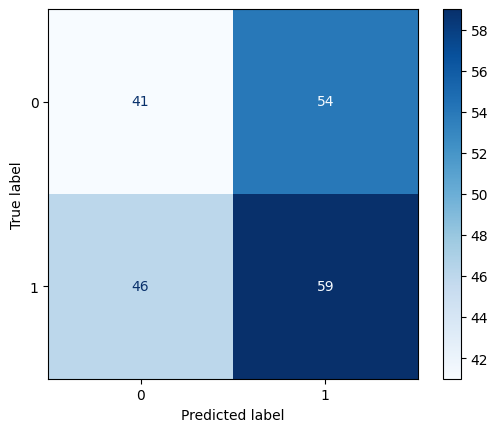

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

threshold = 0.5
model.eval()
with torch.inference_mode():
  y_pred = model(X_test_tensor).squeeze()
y_pred = (y_pred > threshold).float()

cm = confusion_matrix(y_test_tensor, y_pred)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

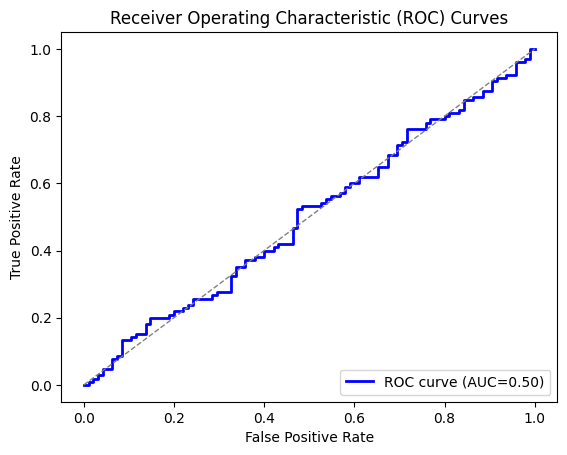

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

threshold = 0.5
model.eval()
with torch.inference_mode():
  y_pred_prob = model(X_test_tensor).squeeze()

y_pred = (y_pred_prob > threshold).float()

fpr, tpr, thresholds = roc_curve(y_test_tensor.numpy(), y_pred_prob.numpy())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC curve (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

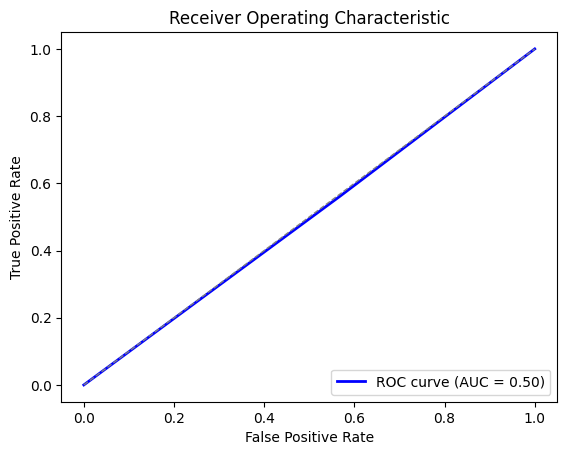

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

threshold = 0.5
model.eval()
with torch.inference_mode():
  y_pred_prob = model(X_test_tensor).squeeze()
y_pred = (y_pred_prob > threshold).float()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_tensor.numpy(), y_pred.numpy())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


Confusion Matrix:
[[41 54]
 [46 59]]


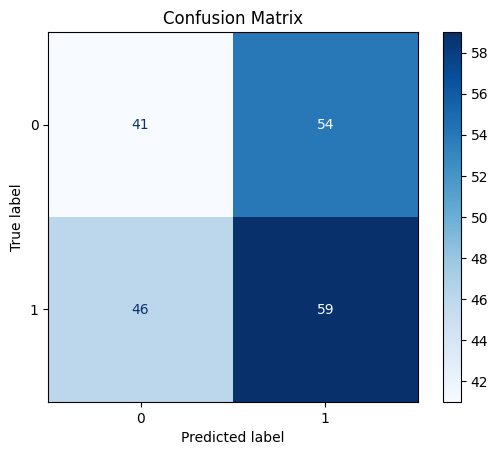

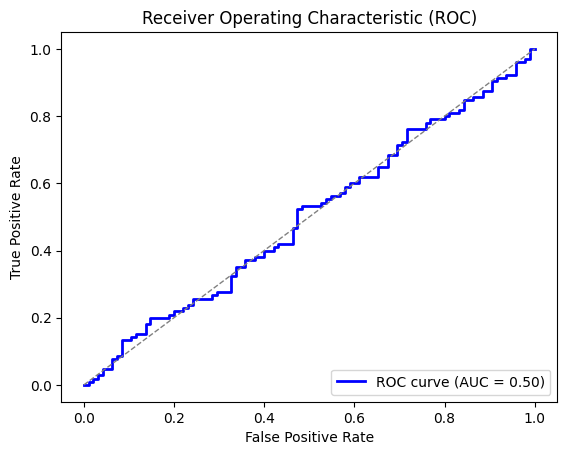

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `model` and `X_test_tensor` are already defined
model.eval()
with torch.inference_mode():
    y_pred_prob = model(X_test_tensor).squeeze()  # Predicted probabilities

# Confusion Matrix
threshold = 0.5
y_pred = (y_pred_prob > threshold).float()  # Convert probabilities to binary predictions
cm = confusion_matrix(y_test_tensor, y_pred)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_tensor.numpy(), y_pred_prob.numpy())  # Compute ROC curve
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()
